# 요구사항분석(기획)

- 연구 목표 설정
- 주제 선정, 시장분석, 데이터 체크, 타겟선정...
- 최종 산출물을 기반으로 진행

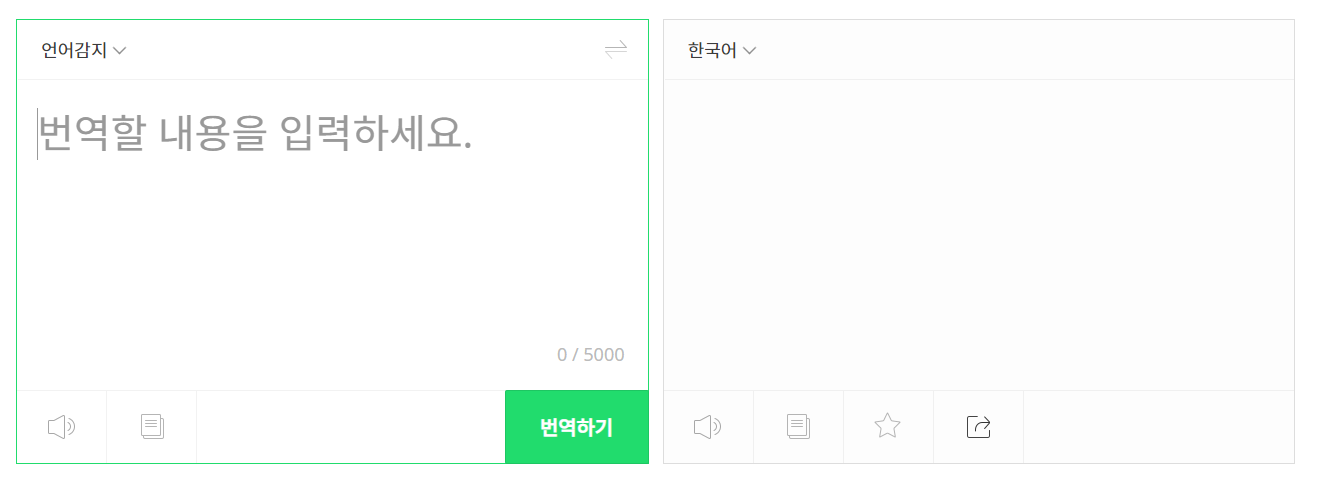

In [1]:
# 파이썬은 파이썬 파일(*.py), 패키지(디렉토리)로 구성된다.
# from ~ import
#import
from IPython.display import Image

Image('/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/프로젝트목표스크린샷.png')

# 최종 산출물의 모습 예시

## 머신러닝 / 딥러닝 시 사용할 데이터

- 대량의 말뭉치
- 같은 내용을 각국 언어별로 표현하면 가상 이상적으로 나타낼 수 있다(제품설명서, 소설, 법문, 뉴스, 위키피디아)
- 절차적으로는 위키피디아에서 수집행위를 수행, 데이터는 시간관계상 제공한다.
- 국가별 언어들의 문자의 사용 빈도는 다르다(주장, 근거)
  - 그 빈도를 알고리즘 / 인공신경망(머신러닝 / 딥러닝)에게 학습시켜서 이를 구분할 수 있게 모델을 준비한다
  - 인코딩
    - utf-8 -> 완성형 (8bit/1byte), euc-kr(unicode:16bit/2byte), ascii...

#### review check

In [2]:
# 8bit 양의 정수 : 0 ~ 225 (2^8-1)
# 16bit 양의 정수 : 0 ~ 65535(2^16-1)

In [3]:
ord('a'), ord('b'), ord('c'), ord('가'), ord('힣')
# 모든 문자를 표현하는 수치 값이 서로 다르다
# 각 수치가 반복되는 빈도(말뭉치상에서) 다르다 => 이 차이점을 학습시킨다

(97, 98, 99, 44032, 55203)

# 데이터 수집/확보

## 데이터 수집 행위를 레벨로 정리

- Level 1
   - 공공/기업내 등등 제공받은 데이터
- Level 2 - open api 활용
  - naver/ kakao/.. resquest => response
  - 이를 통해서 제공받는 데이터는 정형 데이터
- Level 3 - web scrapping
  - bs4
  - 사이트에 접속만 하면 바로 획득 가능한 수준
  - 백그라운드 처리 가능
- Level 4 - crawling
  - selenium + webdriver(브라우저밴더)
  - 원하는 정보까지 도착하기 위해서 ajax기술이 적용되거나, 로그인 등 인증 행위가 진행 => 사람이 무언가 개입이 되어야 되는 상황
- 추가 인사이트
  - html, css, javascript -> 웹서비스의 프런트를 담당 정보를 알면 유리하다
  - css의 seletor에 대한 이해를 알면 유리
  - 툴에서 해결 가능하다


## 위키피디아에서 데이터 획득

- https://en.wikipedia.org/wiki/Tesla,_Inc.
- 해당 사이트를 분석해 보니, 데이터는 사이트에 접속하면 바로 획득 가능 -> level 3 적용 (web scraping)

In [4]:
# 운영체계로 직접 명령을 전달해서 결과를 받는 코드
# !명령어
# 특정 모듈을 설치하거나, 설치된 모듈의 버전을 변경하거나 다 가능ㅠ
!pip3 list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh                         2.3.3
branca                        0.5.0


In [5]:
# 2-1. 모듈 가져오기
from bs4 import BeautifulSoup
import urllib.request as req

In [6]:
# 2-2. 데이터를 획득(요청을 통해)
res = req.urlopen('https://en.wikipedia.org/wiki/Tesla,_Inc.')
res

In [7]:
# 2-3. 결과를 뽑아서(html) 파싱 수행 -> DOM 트리 생성(문서 객체 모델로 메모리에 로드된다.)
soup = BeautifulSoup(res, 'html5lib')

In [8]:
# 2-4 탐색 및 데이터 추출 : 대상은 tesla에 대한 설명문
# 사이트에서 css selector를 활용하여 데이터를 타겟을 특정한다
# => mw-content-text p
tmps = soup.select('#mw-content-text p')
type(tmps), len(tmps)

(list, 184)

In [9]:
# 1개 샘플 데이터 확인 및 판단
# 데이터를 클린하게 하는 과정은 데이터 준비 쪽에서 진행하는 것으로 협의
tmps[1].text.strip()

"Tesla, Inc. (/ˈtɛslə/ TESS-lə[b]) is an American multinational automotive and clean energy company headquartered in Austin, Texas. Tesla designs and manufactures electric vehicles (electric cars and trucks), battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services. Tesla is one of the world's most valuable companies and remains the world's most valuable automaker with a market capitalization of more than US$760\xa0billion. The company had the most worldwide sales of battery electric vehicles and plug-in electric vehicles, capturing 21% of the battery-electric (purely electric) market and 14% of the plug-in market (which includes plug-in hybrids) in 2021. Through its subsidiary Tesla Energy, the company develops and is a major installer of photovoltaic systems in the United States. Tesla Energy is also one of the largest global suppliers of battery energy storage systems, with 3.99 gigawatt-hours (GWh) installed in 2021."

In [10]:
# 2-5 추출된 말뭉치에서 텍스트만 뽑아 좌우의 공백을 제거하고 리스트에 모은다.
#   for 문 사용 => 데이터가 184개로 명확하게 끝이 나와 있기 때문(반복횟수)
texts = list()
# for idx, tmp in enumerate(tmps):
for tmp in tmps:
  texts.append(tmp.text.strip())
  # if idx == 1:
  #   break
len(texts), texts[100]

(184,
 'Tesla acquired a former JC Penney distribution center near Lathrop, California in 2021 to build a Megafactory to manufacture Megapacks.[332] The location opened in 2022 and produces the next-generation Megapacks to use prismatic lithium iron phosphate batteries.[333]')

In [11]:
# 1줄로 표현하시오 -> 결론을 보고 작성하라는 의미
# 리스트(or 딕셔너리, 튜플) 내포
texts2 = [tmp.text.strip() for tmp in tmps]
len(texts2)

184

In [12]:
# 2-6 문자열을 멤버로 가진 리스트(texts2)를 한 개의 문자열(data)로 통합
# samples = list('helloworld')
data = ''.join(texts2)
len(data)

82653

In [13]:
import json
# 2-7 [{'data':'말뭉치', 'label':'en'}] 이런 형식으로 train.json 파일 생성 및 저장
with open('train.json', 'w') as f:
  json.dump( {'data':data, 'label':'en'} , f)

### tip

In [14]:
import json
# 2-6 파일 형태로 제공
# with 문은 I/O 작업할 때 사용, 자동 close를 수행하는 코드, 닫기 수행을 구현하지 않는 개발자들이 발생하는 버그를 잡아준다.
f = open('low_text.json', 'w')
json.dump( { 1:1 }, f)
f.close()

# with문이 종료되면 자동으로 닫힌다.
# 파일, 디비, 네트워크 등등 다 해당
with open('low_text.json', 'w') as f:
  json.dump( { 1:1 } , f)

# 제공된 데이터에서 획득

# 데이터 준비 / 전처리

- 목표
  - 말뭉치 속에 있는 잡음 제거(클린작업)
    - 알파벳이 아닌 문자 제거
    - 전략 : 파이썬의 정규식 활용
  - 알피벳(a-z)의 등장 빈도 카운트
    - 전략 : 카운트, 반복, 로직
  - 정답 추출(en, ko, jp, id, tl, fr...)
    - 주어진 데이터 기준으로 추출
    - 전략 : 파일명에서 추출
  - 데이터가 불균형하다면 정규화 고민
    - 값의 분산에 대한 불균향
      - 지분율로 처리 / 전체 대비 비중 / %
        - softmax()
      - 전략 : 식 => 개별 문자 빈도 / 전체 빈도
    - 분포, 정답의 비율(en 30개, fr 10개)
  - 입력
    -  train/*.txt
    - test/*.txt
  - 출력
    - trains.json
    - test.json

- 이상치, 결측치 처리
- 데이터의 품질을 향상
- 정제, 뒤에서 사용하기에 맞는 형태로 변형
  - 데이터 > 수치화, 원-핫인코딩...

## 데이터 클린 작업 - 잡음제거

- 말뭉치 속에 있는 잡음 제거(클린작업)
  - 알파벳이 아닌 문자 제거
  - 전략 : 파이썬의 정규식 활용
  - 위에서 작업한 말뭉치를 활용

In [15]:
# 3-1-1 정규식 모듈 가져오기
import re

In [16]:
# 3-1-2 정규식 생성
# [a-z] : 문자 1개
# + : 1 ~ 무한대
# * : 0 ~ 무한대
# [^문자] : 해당 문자를 제외하고 
pattern = '[^a-zA-Z]*' # 알파벳을 제외한 모든 문자를 잡는 표현
# 제거 대상 => 가, 12, !@#, ...
p = re.compile(pattern)

In [17]:
# 3-1-3 정규식을 적용하여 알파벳만 남아있는 클린한 low 데이터 획득
tmp = p.sub('', data)
# 소문자 통일 : 사전에 소문자로 처리하고 나서 정규식을 해도되고, 정규식 후 후처리해도 되고
tmp = tmp.lower()
# 데이터 중에 고유명사 ( 상품명 등을 검토, 삭제 혹은 사용할 것인지)
tmp

'teslainctsltesslbisanamericanmultinationalautomotiveandcleanenergycompanyheadquarteredinaustintexastesladesignsandmanufactureselectricvehicleselectriccarsandtrucksbatteryenergystoragefromhometogridscalesolarpanelsandsolarrooftilesandrelatedproductsandservicesteslaisoneoftheworldsmostvaluablecompaniesandremainstheworldsmostvaluableautomakerwithamarketcapitalizationofmorethanusbillionthecompanyhadthemostworldwidesalesofbatteryelectricvehiclesandpluginelectricvehiclescapturingofthebatteryelectricpurelyelectricmarketandofthepluginmarketwhichincludespluginhybridsinthroughitssubsidiaryteslaenergythecompanydevelopsandisamajorinstallerofphotovoltaicsystemsintheunitedstatesteslaenergyisalsooneofthelargestglobalsuppliersofbatteryenergystoragesystemswithgigawatthoursgwhinstalledinteslawasincorporatedinjulybymartineberhardandmarctarpenningasteslamotorsthecompanysnameisatributetoinventorandelectricalengineernikolateslainfebruaryviaamillioninvestmentelonmuskbecamethelargestshareholderofthecompanyhe

In [18]:
# 3-1-4 해당 모듈 함수화 처리
import re

def cleanData(src):
  '''
    잡음이 많은 말뭉치를 받아서 알파벳을 제외한 모든 문자를 제거한 후 반환
    src : 원재료 말뭉치
    return : 순수한 소문자 알파벳말뭉치
  '''
  p = re.compile('[^a-zA-Z]*')
  return p.sub('', data).lower()

cleanData(data)

'teslainctsltesslbisanamericanmultinationalautomotiveandcleanenergycompanyheadquarteredinaustintexastesladesignsandmanufactureselectricvehicleselectriccarsandtrucksbatteryenergystoragefromhometogridscalesolarpanelsandsolarrooftilesandrelatedproductsandservicesteslaisoneoftheworldsmostvaluablecompaniesandremainstheworldsmostvaluableautomakerwithamarketcapitalizationofmorethanusbillionthecompanyhadthemostworldwidesalesofbatteryelectricvehiclesandpluginelectricvehiclescapturingofthebatteryelectricpurelyelectricmarketandofthepluginmarketwhichincludespluginhybridsinthroughitssubsidiaryteslaenergythecompanydevelopsandisamajorinstallerofphotovoltaicsystemsintheunitedstatesteslaenergyisalsooneofthelargestglobalsuppliersofbatteryenergystoragesystemswithgigawatthoursgwhinstalledinteslawasincorporatedinjulybymartineberhardandmarctarpenningasteslamotorsthecompanysnameisatributetoinventorandelectricalengineernikolateslainfebruaryviaamillioninvestmentelonmuskbecamethelargestshareholderofthecompanyhe

## 빈도계산

- 알파벳(a-z)의 등장 빈도 카운트
  - 전략: 카운트, 반복, 로직
  - 데이터가 알파벳만 존재함
    - a~z의 카운트만 체크
      - 유니코드 기반으로 카운트 -> 65535개 카운트

In [19]:
# 3-2-1 알파벳 갯수만큼 값이 0인 리스트를 생성하시오 - 카운트가 담을 그릇
counts = [0 for n in range(26)]
counts

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
#  3-1-2 정규식 생성
# 말뭉치 상에 a-z까지 몇 번 등장하는지 카운트 하시오.
# 결과물 [10, 15, 20, ... 100], python으로만 구현하시오.
# tmp를 원재료로 사용
# a => 97, b => 98, c => 99
# a-a=0, b-a-1, c-a=2
STD_A_INDEX = ord('a')
for ch in tmp: #'helloword'
  # print(ch, ord(ch)-ord('a'))
  # 문자별 카운트를 업데이트할 방 번호 획득
  no = ord(ch)-STD_A_INDEX
  counts[no] += 1
print(counts)

[5603, 873, 2436, 2501, 7655, 1263, 1149, 2320, 4473, 134, 372, 3090, 1622, 4223, 4372, 1306, 68, 4102, 4321, 5673, 1715, 770, 897, 154, 1018, 40]


In [21]:
# 조건식의 결론이 0, 0.0, [], {}, (,), False => 거짓.
if 0:
  print(1)
else:
  print(2)

2


In [22]:
# 1을 출력하고 싶다
# 부정(거짓)을 잡는 방법 => not
if not 0:
  print(1)
else:
  print(2)

1


In [23]:
# 3-2-3 카운트 처리 함수
def countsCh(src):
  '''
    알파벳 소문자만 존재하는 말뭉치를 넣어서 각 문자별 빈도를 계산하여 리스트로 반환
    src : String, 말뭉치
    return : list, 크기는 26, 말뭉치의 빈도가 셋팅되어 있다. a-z 순
  '''
  counts = [0 for n in range(26)]
  # if src == None or len(src) == 0: # src에 문자열이 없거나 값이 없다면, 수치형 블린형은 고려하지 않음
  # if src == None or not len(src):
  if not src:
    return counts
  STD_A_INDEX = ord('a')
  for ch in src:
    no = ord(ch)-STD_A_INDEX
    counts[no] += 1
  return counts

print(countsCh(None))
print(countsCh(''))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
print(countsCh(tmp))
# 데이터를 같은 구간에 넣어서 학습을 하면 통상적으로 성능이 올라간다.
# 0 ~ 1 에 넣는디, 빈도 => 언어 전체에서 특정 문자가 가진 지분, 서열, 영향력
# 개별 문자 빈도 / 총 빈도 수

[5603, 873, 2436, 2501, 7655, 1263, 1149, 2320, 4473, 134, 372, 3090, 1622, 4223, 4372, 1306, 68, 4102, 4321, 5673, 1715, 770, 897, 154, 1018, 40]


## 개별 문자의 빈도를 전체 빈도 대비 비율 계산

- 값의 분산에 대한 불균형
  - 지분율로 처리 / 전체 대비  비중 /%
  - softmax()
  - 전략: 식 => 개별 문자 빈도 / 전체빈도

In [25]:
# 3-3 계산하시오
counts = countsCh(tmp)
총빈도수 = sum(counts)
counts = list(map(lambda x: x/총빈도수, counts))
sum(counts), print(counts)

[0.09015285599356396, 0.014046661303298472, 0.03919549477071601, 0.040241351568785194, 0.12316975060337892, 0.020321802091713595, 0.0184875301689461, 0.03732904263877715, 0.07197103781174577, 0.0021560740144810943, 0.005985518905872888, 0.0497184231697506, 0.026098149637972648, 0.06794851166532583, 0.07034593724859212, 0.02101367658889783, 0.001094127111826227, 0.06600160901045857, 0.06952534191472244, 0.09127916331456154, 0.02759452936444087, 0.012389380530973451, 0.014432823813354787, 0.00247787610619469, 0.016379726468222045, 0.0006436041834271923]


(1.0, None)

## 데이터 로드 모듈 구현

- 편의상 데이터는 TXT 파일로 제공
- 수업 설정상 소량의 데이터로만 진행
- 데이터 형태
  - 데이터 형태
  - 파일명 : en-1.txt (국가코드:정답-인덱스.txt)
    - 파일명으로부터 정답(label, class, 종속변수) 추출이 가능하다
    - 파일 내용 : 일반적인 설명문, 모든 언어에 공통적으로 같은 내용을 설명하고 있는 제품의 설명서 등 재료

In [26]:
# 특정 디렉토리에 있는모든 txt 파일의 목록을 가져오시오
# ~/train/*.txt, ~/text/*.txt
import glob

def getDataFileList(src_dir = 'train'):
  file_lists = glob.glob(f'/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/{src_dir}/*.txt')
  file_lists.sort()
  #print( file_lists )
  return file_lists

getDataFileList()
getDataFileList('test')

['/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/en-1.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/en-2.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/fr-3.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/fr-4.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/id-5.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/id-6.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/jp-11.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/jp-12.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/ko-10.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/ko-9.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/tl-7.txt',
 '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/test/tl-8.txt']

In [27]:
t = '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/train/en-1.txt'
t.split('/')[-1][:2]

'en'

In [28]:
def getLabelInFiles( src_dir='train' ):
  # 목록을 탐색하면서 파일별로 정답을 추출
  file_lists = getDataFileList( src_dir )
  # 1. 목록을 돌면서 파일경로를 한개 추출 -> 반복적 -> for
  labels = list()
  for file in file_lists:
    # 2. 정답 추출 -> '/content/drive/MyDrive/한국품질재단/딥러닝/DAY1/res/train/en-1.txt' => 연산 => 'en'
    label = file.split('/')[-1][:2]
    # 3. 추출된 정답은 리스트에 담는다 -> list.append('en')
    labels.append( label )
  print( labels )

getLabelInFiles('test')

['en', 'en', 'fr', 'fr', 'id', 'id', 'jp', 'jp', 'ko', 'ko', 'tl', 'tl']


In [29]:
2**16

65536

In [30]:
# 목록을 탐색하면서 파일별로 내용을 추출->빈도계산->빈도를 담은 버퍼를 리턴
# 입력:파일명, 연산:빈도게산, 출력:빈도를 담은 버퍼(65536개->ndarray)
import numpy as np
import re

STD_LEN = 2**16                # 유니코드의 총 문자수를 계산해서 전체 크기로 고정(상수 느낌)
STD_LEN_LAST_INDEX = STD_LEN-1 # 65535
def countsCh( fileName, label='en'  ):
  # ndarray, 65536, 초기값 0, 1차원
  counts      = np.zeros( STD_LEN )
  if not fileName:
    return counts

  # fileName -> 읽고, 전처리 -> src
  with open(fileName) as f:
    # 읽기
    text   = f.read()
    # 전처리, 알파벳(a-z), 한글(ㄱ-, ㅏ-ㅣ, 가-힣), 일본어( ? - ? )
    # https://bonita-sy.tistory.com/174
    alpha  = re.compile('[^a-zA-Z]*')
    hangul = re.compile('[^가-힣ㅏ-ㅣㄱ-ㅎ]*')
    japan  = re.compile('[^ぁ-ゔァ-ヴー々〆〤]*')
    # 전처리 => 문자별로 전처리 진행
    if label == 'ko':
      tmp = hangul.sub('', text)      
    elif label == 'jp':
      tmp = japan.sub('', text)      
    else:
      tmp = alpha.sub('', text)
      tmp = tmp.lower()

  # 카운트  
  for ch in tmp:
    no            = ord(ch)
    if no > STD_LEN_LAST_INDEX: # 특정 문자의 방번호가 65535번을 넘어섰다
      continue
    counts[ no ] += 1
  
  # 정규화 => 개별 문자 빈도 / 총 문자 빈도 => 이유:0~1사이로 개별문자의빈도(비율)을
  # 지정하여, 학습시 성능을 높이기위해 데이터 정규화를 진행한다
  count_norms = counts / len(tmp)
  # 리턴
  return count_norms

In [31]:
ord ('a'), ord('가')

(97, 44032)

In [32]:
# 내용이 추출되면 전처리를 통해서 총 26개(알파벳문자수)의 빈도추출
# 빈도 데이터는 (20, 26), 정답 (20,) or (20, 26+1)
# 만약 한국어 5개, 일본어 5개가 추가되면
# 최종 결과 => ( 20+10 , 65536 + 1 )
def loadData( src_dir='train' ):
  # 1 목록가져오기
  files = getDataFileList( src_dir )
  # 2 데이터를 담을 그릇 준비
  labels    = list()
  features  = list()
  for file in files:
    # 2 정답추출
    label  = file.split('/')[-1][:2]
    # 3 빈도추출
    counts = countsCh( file, label )
    # 4 정답 및 빈도 담기 -> 데이터가 적어서 리스트로 처리
    labels.append( label )
    features.append( counts )
  # 4 최종결과 리턴
  #print( label, counts)
  return { "labels":labels, "features":features } 

In [33]:
# 훈련용
train_data = loadData()
print( train_data )
# 테스트용
test_data  = loadData( 'test' )
print( test_data )

{'labels': ['en', 'en', 'en', 'en', 'en', 'fr', 'fr', 'fr', 'fr', 'fr', 'id', 'id', 'id', 'id', 'id', 'jp', 'jp', 'jp', 'jp', 'jp', 'ko', 'ko', 'ko', 'ko', 'ko', 'tl', 'tl', 'tl', 'tl', 'tl'], 'features': [array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.

In [34]:
# 훈련용 데이터의 정답의 shape은 (30,) 확인되었다
np.array( train_data['labels'] ).shape

(30,)

In [35]:
# 훈련용 데이터의 feature shape은 (30, 65536) 확인되었다
np.array( train_data['features'] ).shape

(30, 65536)

## 데이터 적제

-  메모리에 로드
- 파일 / 디비에 기록
  - 배열을 기록(*.npy or *.npz)
    - 장점 1 : 로딩 속도가 빠르다
    - 장점 2 : 경우에 따라 전처리가 모두 완료된 형태

In [36]:
# 저장
path = '/content/drive/MyDrive/빅데이터_딥러닝/Day01/res/'

np.save( path + 'train_features.npy',  np.array( train_data['features'] ) )
np.save( path + 'test_features.npy',   np.array( test_data['features'] ) )

np.save( path + 'train_labels.npy',    np.array( train_data['labels'] ) )
np.save( path + 'test_labels.npy',     np.array( test_data['labels'] ) )

In [37]:
np.savez( path + 'train.npz', 
          features = np.array( train_data['features'] ), 
          labels   = np.array( train_data['labels'] )     )

In [38]:
# 로드후 확인
np.load( path + 'train_labels.npy') 

array(['en', 'en', 'en', 'en', 'en', 'fr', 'fr', 'fr', 'fr', 'fr', 'id',
       'id', 'id', 'id', 'id', 'jp', 'jp', 'jp', 'jp', 'jp', 'ko', 'ko',
       'ko', 'ko', 'ko', 'tl', 'tl', 'tl', 'tl', 'tl'], dtype='<U2')

# 데이터분석

- 데이터 분석이 주제이면 많은 부분이 진행
- 머신러닝 / 딥러닝이 주제면 생략도 가능하다
- 데이터가 유의미 하다는 것을 증명할 필요가 있다.
- 시각화, 분석행위를 진행, 데이터의 균형을 체크
- **여기서는 알파벳에 관련된 데이터만 검토, 시각화로 마무리한다**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터 불러오기

- *.npy => 데이터로드, 알파벳 데이터만 취한다

In [40]:
d1 = np.load( path + 'train_features.npy')
d1.shape

(30, 65536)

In [41]:
d2 = np.load( path + 'train_labels.npy')
print( d2 )

['en' 'en' 'en' 'en' 'en' 'fr' 'fr' 'fr' 'fr' 'fr' 'id' 'id' 'id' 'id'
 'id' 'jp' 'jp' 'jp' 'jp' 'jp' 'ko' 'ko' 'ko' 'ko' 'ko' 'tl' 'tl' 'tl'
 'tl' 'tl']


In [42]:
# 알파벳만, 영어권 국가만 추출하시오 => ( 20, 26 )
t1 = d1[ :15 ,  ord('a'):ord('z')+1 ]
t1.shape

(15, 26)

In [43]:
t2 = d1[ -5: ,  ord('a'):ord('z')+1 ]
t2.shape


(5, 26)

In [44]:
# 단순 합치기
t3 = np.concatenate( (t1, t2) )
t3.shape

(20, 26)

In [45]:
# 데이터 프레임 생성
df_freqs = pd.DataFrame( t3 )
df_freqs.head(1)
# 컬럼명을 a-z까지로 변경하시오

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.075952,0.01284,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,...,0.0,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435


In [46]:
from string import ascii_lowercase
df_freqs.columns = list( ascii_lowercase )
df_freqs.head(1)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.075952,0.01284,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,...,0.0,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435


In [47]:
# (20, 26) => (20, 26+1) : 정답 추가 , 컬럼명 label, 변수명은 df_data
df_freqs.shape

(20, 26)

In [48]:
# 정답 데이터를 df로
df_label = pd.DataFrame(np.concatenate((d2[:15], d2[-5:])), columns=['label'])
df_label.shape

(20, 1)

In [49]:
df_label.head(1)

,label
0,en


In [50]:
# df 병합 : concat(), merge()
df_data = pd.concat( [df_freqs, df_label], axis=1 )
df_data.shape

(20, 27)

## 바차트

- x축은 a-z
- y축은 빈도
- 정답별로 표시(차트는 총 4개)
- 4개 언어를 동시에 비교하여, 그 빈도 차이를 표시한다

In [51]:
df_data.head(2)
# 정답을 기준으로 데이터들을 평균내에서 시각화 한다
# (4, 26+1)
# 인덱스에 label값, 나머지 데이터는 평균으로 집계 (4, 26) <=
# 특정 컬럼의 값이 반복적으로 보인다 => uniue 해보니 4개만 나오더라 => 범주형데이터
# 범주형 데이터인 특정 컬럼을 (1~n개) 기준으로 전체 데이터를 재구성 => 피벗
df_data_pv = df_data.pivot_table(index=df_data.label )
df_data_pv

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
label,,,,,,,,,,,,,,,,,,,,,
en,0.075558,0.018601,0.036565,0.039376,0.124937,0.016977,0.023900,0.042127,0.074847,0.002329,...,0.001592,0.070693,0.070782,0.085701,0.026975,0.011627,0.016694,0.002466,0.016232,0.000788
fr,0.076184,0.013140,0.036708,0.049218,0.150276,0.012729,0.013279,0.014710,0.077635,0.003138,...,0.005976,0.077311,0.074179,0.067649,0.049077,0.013363,0.001796,0.004234,0.004813,0.000915
id,0.160047,0.026276,0.008391,0.038213,0.085395,0.008259,0.044496,0.017399,0.095626,0.006473,...,0.000036,0.056469,0.061414,0.049494,0.044268,0.003768,0.004730,0.000725,0.012463,0.000807
tl,0.210537,0.021824,0.010842,0.019756,0.041240,0.003260,0.075524,0.014543,0.078540,0.001603,...,0.000680,0.030609,0.054899,0.051996,0.030127,0.002815,0.009956,0.000430,0.025048,0.001396


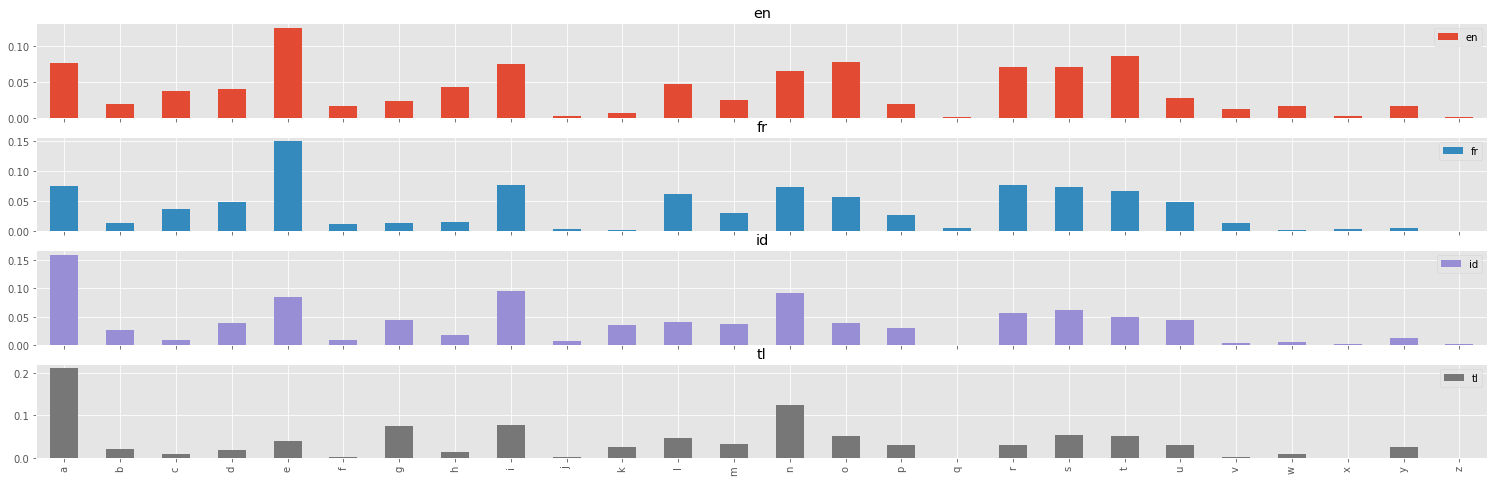

In [52]:
plt.style.use('ggplot')
# df로 시각화 하겠다 -> 문제발생 -> 컬럼과 인덱스의 자리를 서로 바꾼다 (26, 4) : T함수는 축변경
df_data_pv.T.plot(kind='bar',
                subplots=True,
                figsize=(26, 8)

                )
plt.savefig('alpha_per_frequence.png')
plt.show()
# 이 차트의 한계점 y축의 빈도 limit가 다르다
# 문자별로 비교하는 것이 합리적 일 듯

## 히스토그램

- 모든 데이터를 사용
- 문자별로 빈도의 위치를 표시
- 국가별로 어느정도 차이가 나는지 체크
- 모든 표의 개수는 26개

In [53]:
# df_data에서 정답만 중복되지 않게 출력하시오
df_data.label.unique()

array(['en', 'fr', 'id', 'tl'], dtype=object)

In [54]:
df_data[df_data.label == 'en']['a'] #'a'괄호 하나 -> 시리즈, 2개 -> 데이터프레임

0    0.075952
1    0.084178
2    0.071646
3    0.072210
4    0.073806
Name: a, dtype: float64

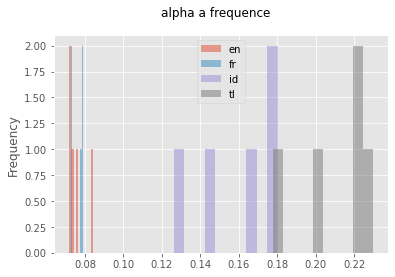

a


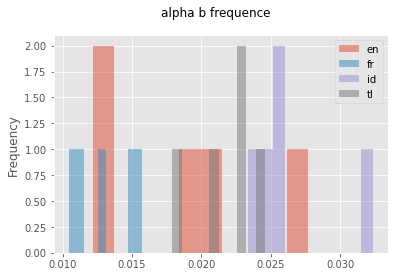

b


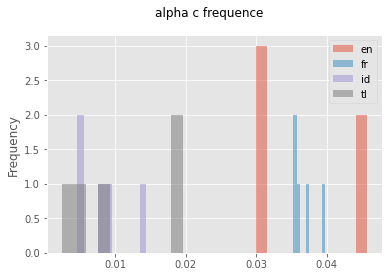

c


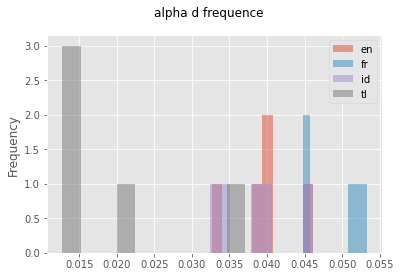

d


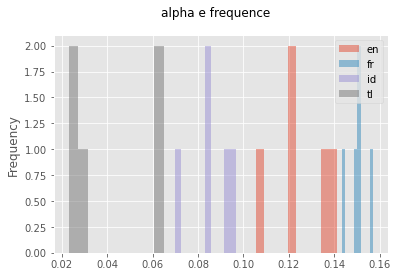

e


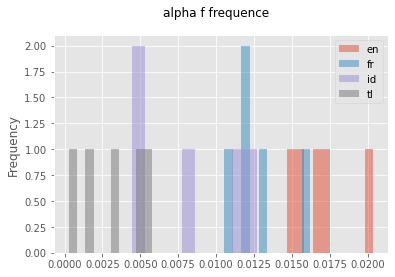

f


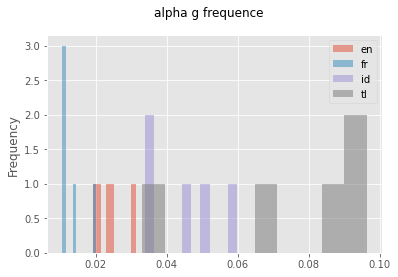

g


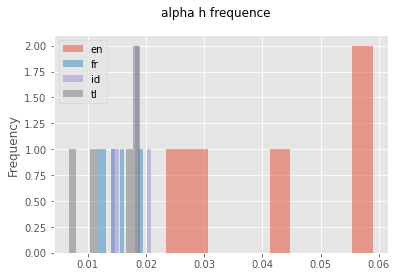

h


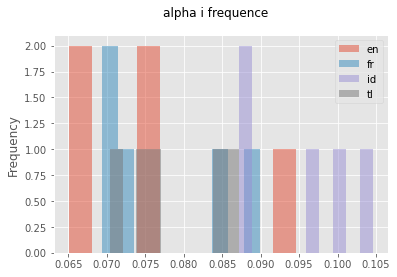

i


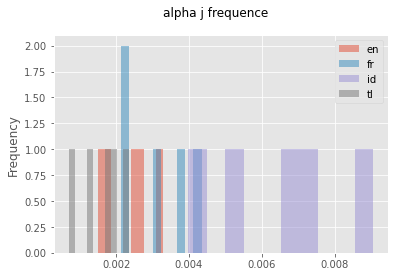

j


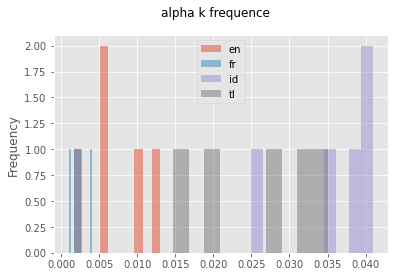

k


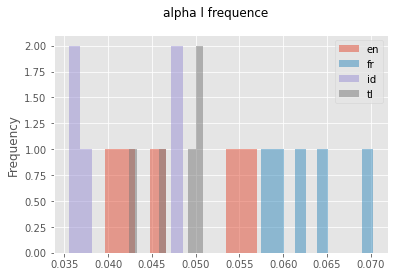

l


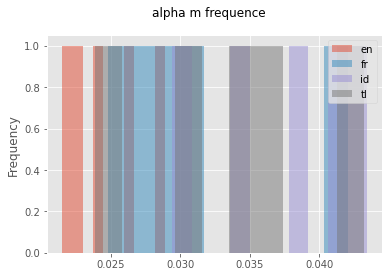

m


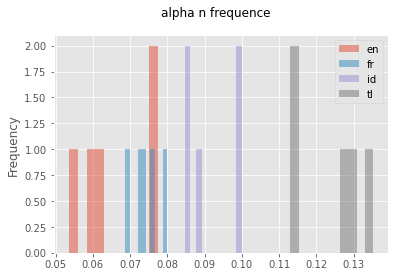

n


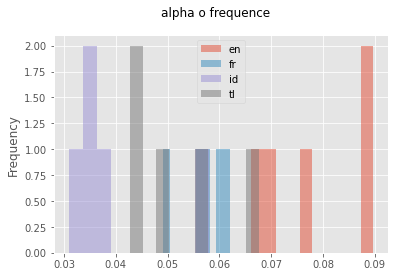

o


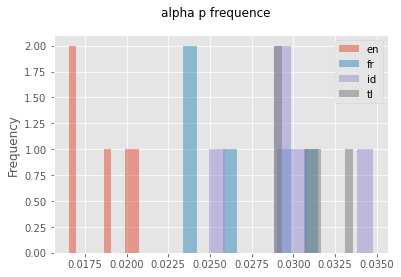

p


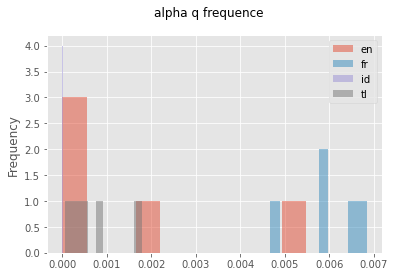

q


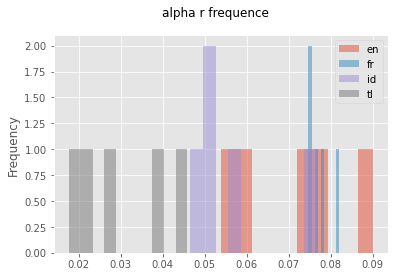

r


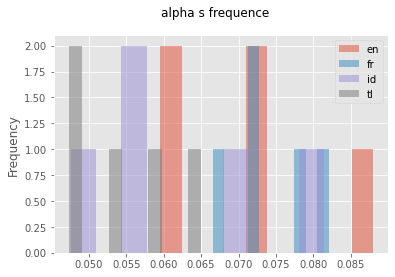

s


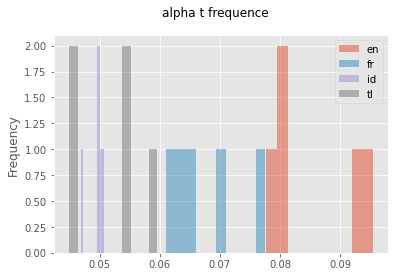

t


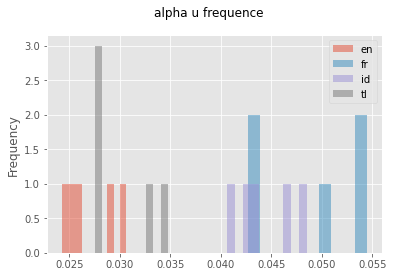

u


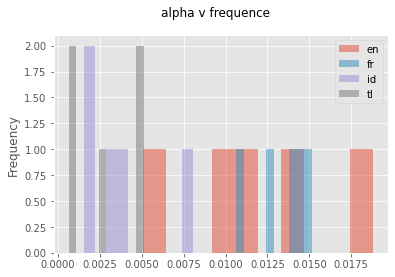

v


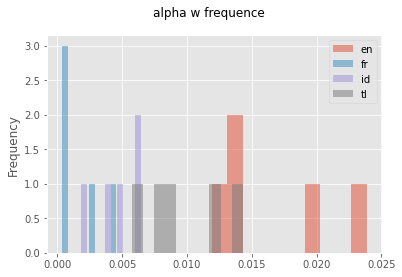

w


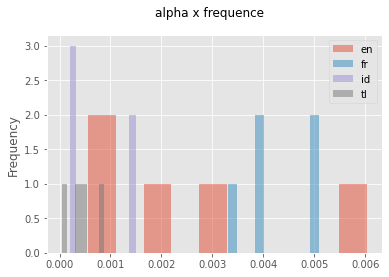

x


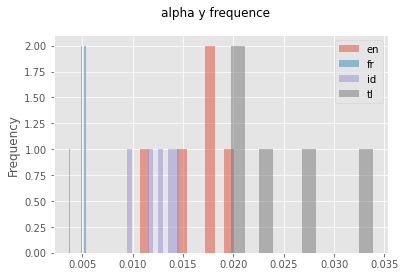

y


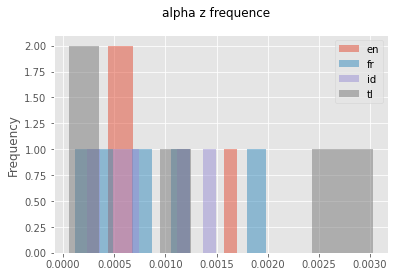

z


In [55]:
# 26회 반복, a만 확인 후 이상이 없으면 전체에 적용
# 그리는 데이터는 전체 다 사용한다(20,1) => 26번 반복
labels = df_data.label.unique()
for word in ascii_lowercase:
  # 정답별로 덩어리채 드로잉 (5, 1)
  for label in labels:
    # 해당 국가에 적용되는 데이터만 추출 + 특정 문자만 => (5, 1)
    # label, word
    tmp = df_data[label == df_data.label][word]
    tmp.plot(kind='hist', alpha=0.5, label=label)
  plt.legend()
  plt.suptitle(f'alpha {word} frequence')
  plt.show()
  print(word)
  # break
# 인간의 지성 능력으로는 언어별 빈도의 차이를 알기가 어렵다
# 모델(머신러닝/딥러닝으로 만들어진)에 데이터를 넣어서 학습시킨 후, 이 모델이 스스로 구분할 수 있도록 만들어주면 해결 가능

## 선형 그래프

- x축 a-z
- y축 빈도
- 한 차트에 모든 언어를 표시
- 선형차트이므로 모든 빈도가 직선으로 이어진다

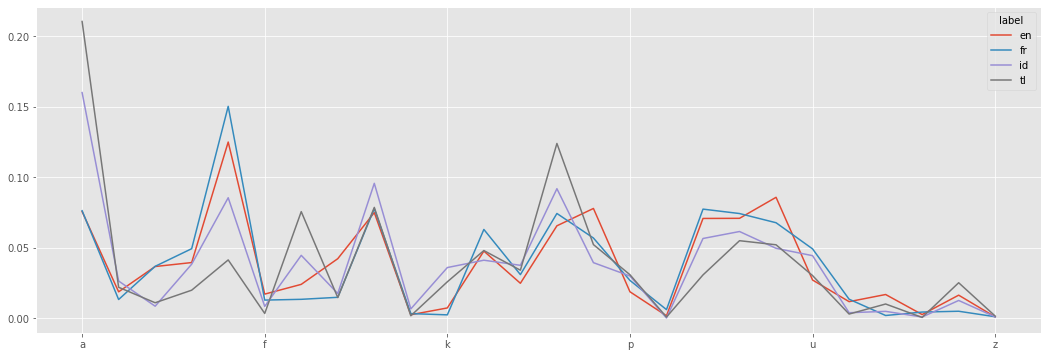

In [56]:
df_data_pv.T.plot(kind='line', figsize=(18, 6))
# 기계학습을 통해서 언어별 구분이 가능할 것으로 보인다

# 모델 구축

- 머신러닝 혹은 딥러닝 학습을 진행한다
- 머신러닝 절차
- 딥러닝 절차
- 도출된 결과가 만족스럽지 못하다면 (ex. 정확도 95%를 올려라고 한다면)
  - 데이터를 추가, 전처리 및 모델을 조정

## 머신러닝 / 딥러닝의 본질

In [57]:
# 기존 s/w 관점
# 함수라는 것은 특정 기능을 수행하는 단위
# 데이터, 규칙 => 연산 => 정답(출력)
# 개발자가 규칙을 직접 작성했다(로직, 알고리즘)
def add(x, y):
  '''
  이 함수는 더하기 함수, 입력으로 들어온 2개의 변수를 더해서 리턴(출력) 해주는 함수
  x: int
  y: int
  '''
  res = x + y
  return res

add(1,2)

3

In [58]:
# 수많은 사진을 주고 이 사진의 객체를 인식하여라.
# 바나나, 고양이, 사람, 자전거,...
# 참고할 수 있는 데이터를  (입력) 천 만장 제공한다
# 개발자는 규칙을 짤 수 있는가? => 기계의 힘을 빌려보자
# 인간의 지성을 초월한 문제들... => 해결책 : 인공지능
# 인공지능 > 머신러닝 > 딥러닝 등의 기법들이 개발
# 최초의 기계는 바보이다. > 데이터를 넣고 '이게 바나나야'라고 학습을 시켜야 한다.
# 아주 많이 반복적으로 학습을 시켜야 한다. > 결과로 -> 바나나를 구분하게 된다.
def checkObject(img):
  # 객체 인식 -> 고도로 학습된 머신러닝 / 딥러닝 모델을 활용해서 인식시킨다.
  # 모델이 img를 입력받아서 예측하고 바바나일 확률을 리턴시킨다.
  # 데이터(1,000만 장의 사진), 정답(바나나, 고양이,...) => 연산 => 규칙이 생성
  # 머신러닝은 알고리즘을 훈련하는 것
  # 딥러닝은 인공 신경망을 훈련 하는 것 -> 서로의 훈련이 다르다!
  # 현재의 인공지능은 1가지를 잘하는 모델 : 약 AI
  pass

## 머신러닝

- **지도학습 (알고리즘)**
  - 데이터에 **정답**이 존재한다
  - 분류
    - **이 사진은 바나나(90% 확률)입니다.**
    - **딥러닝**(상당수는 분류의 문제이다)
  - 회귀
    - 이 집(주식)의 가격은 1,000,000,000원으로 예측된다
    - 근사치를 맞춤(적당한 오차값이 존재)
- 비지도학습 (알고리즘)
  - 데이터에 정답이 없다
  - 군집 -> 단독 주제가 되기도 하지만 통산분류/ 회귀의 과정에서 사용
  - 차원축소 -> 전처리용으로 많이 사용
- 준지도학습
- 강화학습
  - DQN, ...
  -초기 데이터 없음, 게임을(규칙) 통해서 생성되고 이를 기반으로 학습이 진행됨


### 1. 문제 유형 분석

- 지도학습 > 분류 알고리즘 사용
- 알고리즘 선택 시트 활용
  - SVM.svc
  - 앙상블( 보팅, 배깅, 부스팅, 스태킹)
    - RandomForest
  - 나이브베이즈(텍스트 계열 데이터)
    - GussianNB
  - 이런 알고리즘들을 같이 돌려서 가장 베스트 알고리즘을 선택하겠다

### 2.모델 선정(알고리즘)

In [59]:
!pip3 list | grep scikit-learn

# 개발 환경(패키지들)을 저장하여 운영환경에 새로 셋팅할 때 활용
# freeze requirements.txt
# pip install -r requirements.txt

scikit-learn                  1.0.2


In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
clf = GaussianNB()

### 3. 데이터 준비

- 데이터 덩어리에서 통산 75:25 비율로 구성
  - 75(훈련):25(테스트)
  - train_test_split()
  - 검증폴드를 지정하면(cv)를 지정하면 검증용 데이터도 훈련용에서 나눠서 제공된다
- 용도별 의미
  - 훈련 데이터 : 모델 **학습** 용도
  - 검증 데이터 : 모델 성능 **조정** 용도
  - 테스트 데이터 : 모델 성능 **평가** 용도
- 여기서는 이미 나눠서 제공(편의상)
  - 훈련, 테스트용으로 별도로 로드해서 사용

In [62]:
# 훈련용 피처 데이터 2차원
X_train = pd.DataFrame(np.load(path + 'train_features.npy'))
X_train.shape

(30, 65536)

In [63]:
# 훈련용 정답 데이터는 1차원
X_label = pd.Series(np.load(path + 'train_labels.npy'))
X_label.shape

(30,)

### 4. 학습

- 머신러닝 학습
  - 알고리즘을 훈련시킨다
  - 학습이 진행되면 내부값이 조정되는 것이 아니라, 학습의 결과 후 파라미터를 조정하여 다시 진행
  - 이를 통해서 최적의 파라미터를 찾는다
  - 하이퍼파라미터 튜닝

In [64]:
clf.fit(X_train, X_label)

GaussianNB()

### 5. 예측

- 테스트 데이터를 넣어서 모델에 입력 후 예측 수행
- 산출물 상에서 모델이 구동되는 형태와 유사

In [65]:
# 테스트 피처 데이터/정답 데이터 로드
X_test = pd.DataFrame( np.load( path + 'test_features.npy') )
X_test.shape

(12, 65536)

In [66]:
X_test_label = pd.Series( np.load( path + 'test_labels.npy'))
X_test_label.shape

(12,)

In [67]:
# 예측
y_pred = clf.predict(X_test)
y_pred

array(['en', 'en', 'en', 'fr', 'en', 'id', 'jp', 'jp', 'ko', 'ko', 'tl',
       'tl'], dtype='<U2')

### 6. 성능평가

- 분류
  - 혼동행렬 기반 계산
    - 정밀도, 재현율, F1-score, 조화율
    - 정확도, ROC, AUC, ...
      - 값이 100에 가까울수록 좋은 모델
- 회귀
  - 손실함수(MSC, RMSC, ...) 값이 0에 가까울 수록 좋은 모델
  - 원래 값과 예측값의 차이값(오차값)이 총합해서 그 값의 평균이 0에 가까우면 예측을 잘했다

In [68]:
# 도구
from sklearn.metrics import accuracy_score # 점수를 보는 대표적인 도구
accuracy_score(X_test_label, y_pred)
# 정확도 83%
# 미션 -> 정확도를 95%까지 높이시오
# 전략, 데이터를 증량, 품질 검토, 정규화 검토 등등
 # 알고리즘 교차검증 및 하이퍼파라미터 튜닝과 같은 파이프라인 구축을 통해 완성
 # 이를 통해 95% 이상되는 알고리즘과 하이퍼파라미터를 찾는다

0.8333333333333334

In [69]:
# 평가 레포트
from sklearn.metrics import classification_report
print(classification_report(X_test_label, y_pred))

              precision    recall  f1-score   support

          en       0.50      1.00      0.67         2
          fr       1.00      0.50      0.67         2
          id       1.00      0.50      0.67         2
          jp       1.00      1.00      1.00         2
          ko       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           0.83        12
   macro avg       0.92      0.83      0.83        12
weighted avg       0.92      0.83      0.83        12



### 7. 최적화


- 알고리즘을 n개 준비
- 개별 알고리즘에 대한 하이퍼파라미터 후보리스트업 및 값의 바운더리 준비
- 파이프라인 생성 전체 시퀀스 연결
- 교차 검증 기반으로 학습 및 최고 성적 모델을 확인

In [70]:
# 후보 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# 교차 검증용 클래스
from sklearn.model_selection import GridSearchCV

In [71]:
# 파이프라인
from sklearn.pipeline import make_pipeline, Pipeline # 대문자는 클래스
# 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [72]:
# 기본 옵션
# 파이프라인의 인자값을 리스트로 변경 {} => []
pipe_std = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

In [73]:
# 비교 대상 옵셩 구성
param_grid = [
    {
        'scaler' : [StandardScaler(), MinMaxScaler()],
        'clf': [SVC()],
        #하이퍼파라미터 표시 => 분류기 이름__파라미터명
        'clf__C' : [1,2,3],
        'clf__gamma' : [0,1,2]
    },# svc는 총 2*3*3 => 18개의 알고리즘이 생성되서 학습 진행됨
    {
      'scaler' : [None],
      'clf' : [RandomForestClassifier(n_estimators=90)],
      'clf__n_estimators' : [120, 300],
      'clf__max_depth' : [5,8]
    },
    {
        'scaler' : [None],
        'clf' : [LogisticRegression()],
        'clf__C' : [1,2,3]
    },
]

In [74]:
# 교차 검증용
grid = GridSearchCV(pipe_std, param_grid, cv=5)

In [75]:
# 학습
grid.fit(X_train, X_label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [SVC()], 'clf__C': [1, 2, 3],
                          'clf__gamma': [0, 1, 2],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'clf': [RandomForestClassifier(max_depth=5,
                                                         n_estimators=120)],
                          'clf__max_depth': [5, 8],
                          'clf__n_estimators': [120, 300], 'scaler': [None]},
                         {'clf': [LogisticRegression()], 'clf__C': [1, 2, 3],
                          'scaler': [None]}])

In [76]:
# 최적의 알고리즘 : RandomForestClassifier, max_depth=5, n_estimators=120
grid.best_estimator_

Pipeline(steps=[('scaler', None),
                ('clf', RandomForestClassifier(max_depth=5, n_estimators=120))])

In [77]:
# 최적 알고리즘의 점수
grid.best_score_

1.0

In [78]:
# 테스트 데이터 확인
grid.score(X_test, X_test_label)

1.0

## 딥러닝



### 모델 덤프

- 학습된 모델을 시스템 통합 단계로 전달하기 위해 파일형태로 저장 제공
- 머신러닝
  - joblib 통해 덤프(파일저장)
  - 확장자는 자유롭긴하다. *.pkl, *.mode
- 딥러닝
  - 엔진별로 확장자가 상이
  - 모델구조, 가중치, 바이어스 저장

In [79]:
import joblib # 사이킷런이 있었지만 최근에 빠졌음

joblib.__version__ # 버전을 따로 신경쓸 때 버전을 찍어본다

'1.1.0'

In [80]:
# 덤프
# 저장된 내용을 모델을 그대로 재현할 수 있는 구조, 알고리즘, 내부 조정값들을 저장
joblib.dump(grid, 'ml.pkl')

['ml.pkl']

In [81]:
# 로드
model = joblib.load('ml.pkl')

In [82]:
# 예측
model.predict(X_test)

array(['en', 'en', 'fr', 'fr', 'id', 'id', 'jp', 'jp', 'ko', 'ko', 'tl',
       'tl'], dtype=object)

In [84]:
# 정확도 확인
model.score(X_test, X_test_label)

1.0

## 운영환경 필수 설치 모듈

- scikit-learn==1.0.2
- joblib==1.1.0
- 통상적으로 사용한 모듈이 많으면 requirements.txt로 저장해서 파일로 관리

# 시스템 통합

 - 산출물 생성, service 생성, s/w 생성
 - 사내 진행
  - ex) 사내 그룹웨어에 통합된 기능 제공
- 단독 서비스
- 레포트 제공되어 의사결정의 자료로 사용

- 결과물
  - flask 기반(심플) 웹서비스
  - 1 page로 구성(ui는 papao를 참고)
  -  동작(프런트 중심)
    - 왼쪽 창에 텍스트를 입력
    - 언어감지 버튼 클릭
      - ajax로 비동기 백그라운드 통신을 진행
      - 서버로부터 예측 결과를 받아 화면에 표현

- 절차
  - 아나콘다에서 가상환경 생성 (web)
  - 가상환경기반에서 터미널 오픈
    - (web)>
  - 해당 환경에서 필요한 모듈 설치
    - conda install scikit-lean==1.0.2 -y
    - conda install joblib==1.1.0 -y
    - conda install pandas -y
    - conda install flask -y
  - 프로젝트 폴더 생성 (적당한위치)
    - 리소스 이동(*.npy, *pkl)
    - 파일 생성(run.py : 엔트리포인트)
    - 웹 서비스 구현
